In [1]:
# Jupyter Imports
import warnings
from IPython.display import SVG
from IPython.display import display

warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Basic Imports
import numpy as np
import pandas as pd

In [3]:
# Graphical Imports
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib import rc
sns.reset_defaults()
sns.reset_orig()
sns.color_palette("Set2")
rc('font', **{"size": 12})

In [4]:
# Dataset
fields = ["ID", "DATAANALISE", "CAMERAID", "QTDEPESSOAS"]
real_df = pd.read_csv("data/dataset.csv", usecols=fields)
real_df

,ID,DATAANALISE,CAMERAID,QTDEPESSOAS
0,37217,2020-05-18 10:38:45,1720,0
1,37218,2020-05-18 10:39:16,1722,0
2,37219,2020-05-18 10:39:35,1723,0
3,37220,2020-05-18 10:39:51,1730,0
4,37221,2020-05-18 10:40:29,1739,2
...,...,...,...,...
11034,43458,2020-06-03 15:13:20,1753,2
11035,43459,2020-06-03 15:14:06,1754,1
11036,43460,2020-06-03 15:14:02,1762,3
11037,43461,2020-06-03 15:17:21,1767,0


In [5]:
# Predicted data
pred_df = pd.read_csv("output/benchmark-0.2-0.4.csv")
pred_df

,file,pedestrians
0,25770,17
1,27881,4
2,29087,3
3,29090,8
4,31930,9
...,...,...
1652,43500,5
1653,43501,3
1654,43502,2
1655,43511,9


In [6]:
# Join
df = real_df.merge(pred_df, left_on='ID', right_on='file')
df

,ID,DATAANALISE,CAMERAID,QTDEPESSOAS,file,pedestrians
0,37221,2020-05-18 10:40:29,1739,2,37221,0
1,37229,2020-05-18 10:46:17,1774,2,37229,2
2,37258,2020-05-18 10:59:24,1706,5,37258,5
3,37290,2020-05-18 11:20:37,1774,6,37290,7
4,37292,2020-05-18 11:21:50,1777,4,37292,3
...,...,...,...,...,...,...
1652,43446,2020-06-03 15:00:56,1700,3,43446,3
1653,43448,2020-06-03 15:02:08,1702,6,43448,4
1654,43449,2020-06-03 15:03:29,1706,8,43449,5
1655,43453,2020-06-03 15:10:12,1722,2,43453,2


In [7]:
# Compute Difference
df["rawdiff"] = df["QTDEPESSOAS"] - df["pedestrians"]
df["absdiff"] = abs(df["QTDEPESSOAS"] - df["pedestrians"])
df

,ID,DATAANALISE,CAMERAID,QTDEPESSOAS,file,pedestrians,rawdiff,absdiff
0,37221,2020-05-18 10:40:29,1739,2,37221,0,2,2
1,37229,2020-05-18 10:46:17,1774,2,37229,2,0,0
2,37258,2020-05-18 10:59:24,1706,5,37258,5,0,0
3,37290,2020-05-18 11:20:37,1774,6,37290,7,-1,1
4,37292,2020-05-18 11:21:50,1777,4,37292,3,1,1
...,...,...,...,...,...,...,...,...
1652,43446,2020-06-03 15:00:56,1700,3,43446,3,0,0
1653,43448,2020-06-03 15:02:08,1702,6,43448,4,2,2
1654,43449,2020-06-03 15:03:29,1706,8,43449,5,3,3
1655,43453,2020-06-03 15:10:12,1722,2,43453,2,0,0


In [8]:
# Diff square
df["diffsq"] = (df["QTDEPESSOAS"] - df["pedestrians"]) ** 2
df

,ID,DATAANALISE,CAMERAID,QTDEPESSOAS,file,pedestrians,rawdiff,absdiff,diffsq
0,37221,2020-05-18 10:40:29,1739,2,37221,0,2,2,4
1,37229,2020-05-18 10:46:17,1774,2,37229,2,0,0,0
2,37258,2020-05-18 10:59:24,1706,5,37258,5,0,0,0
3,37290,2020-05-18 11:20:37,1774,6,37290,7,-1,1,1
4,37292,2020-05-18 11:21:50,1777,4,37292,3,1,1,1
...,...,...,...,...,...,...,...,...,...
1652,43446,2020-06-03 15:00:56,1700,3,43446,3,0,0,0
1653,43448,2020-06-03 15:02:08,1702,6,43448,4,2,2,4
1654,43449,2020-06-03 15:03:29,1706,8,43449,5,3,3,9
1655,43453,2020-06-03 15:10:12,1722,2,43453,2,0,0,0


## Plot Two Histogram

In [9]:
real_series = df["QTDEPESSOAS"]
real_series.describe()
np.histogram(real_series, bins=60)


(array([  2, 408, 308, 208, 167, 110,  81,  54,  43,  31,  28,  26,  17,
         14,  11,  16,  13,  12,  13,   8,   5,   6,   4,   7,   7,   0,
          3,   2,   3,   5,   4,   3,   2,   4,   0,   0,   1,   8,   2,
          3,   1,   0,   0,   3,   1,   0,   0,   0,   1,   1,   0,   2,
          2,   0,   1,   1,   0,   0,   2,   3], dtype=int64),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61.]))

In [10]:
monflow_series = df["pedestrians"]
monflow_series.describe()
np.histogram(monflow_series, bins=55)

(array([ 39,  95, 260, 254, 212, 203, 118, 103,  68,  54,  40,  37,  29,
         17,  13,  12,  13,  14,   0,   2,   7,   9,   4,  10,   2,   3,
          1,   2,   3,   7,   1,   3,   2,   0,   0,   4,   0,   3,   2,
          1,   1,   1,   0,   0,   2,   1,   1,   1,   0,   1,   0,   0,
          1,   0,   1], dtype=int64),
 array([ 0.        ,  0.94545455,  1.89090909,  2.83636364,  3.78181818,
         4.72727273,  5.67272727,  6.61818182,  7.56363636,  8.50909091,
         9.45454545, 10.4       , 11.34545455, 12.29090909, 13.23636364,
        14.18181818, 15.12727273, 16.07272727, 17.01818182, 17.96363636,
        18.90909091, 19.85454545, 20.8       , 21.74545455, 22.69090909,
        23.63636364, 24.58181818, 25.52727273, 26.47272727, 27.41818182,
        28.36363636, 29.30909091, 30.25454545, 31.2       , 32.14545455,
        33.09090909, 34.03636364, 34.98181818, 35.92727273, 36.87272727,
        37.81818182, 38.76363636, 39.70909091, 40.65454545, 41.6       ,
        42.54

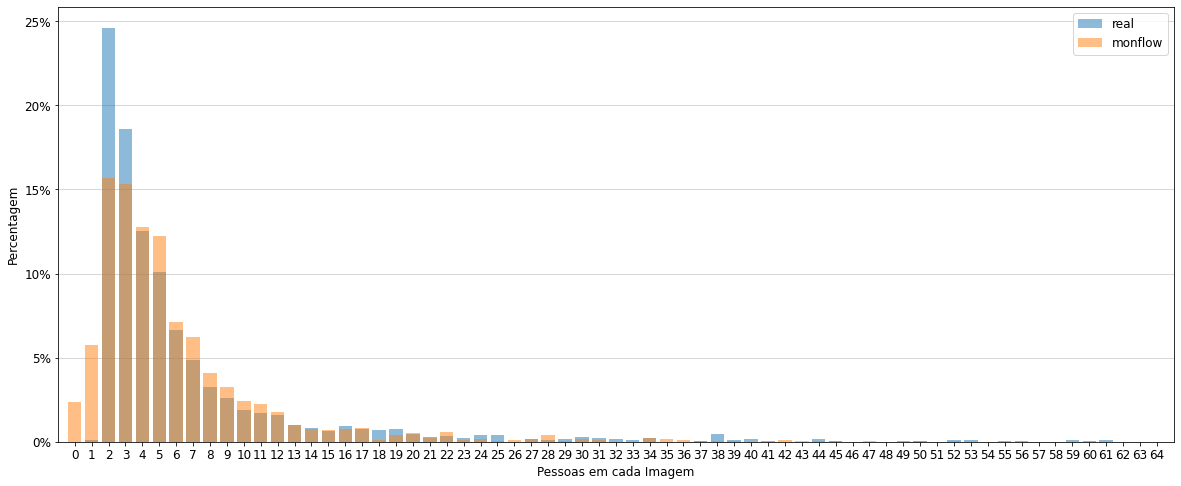

In [12]:
fig, ax = plt.subplots(figsize=(20,8))
boxes = np.arange(-0.5, 62, 1).tolist()
plt.grid(zorder=0, linewidth=0.5, axis='y')
ax.hist(real_series, bins=boxes, rwidth=0.8, density=True, alpha=0.5, histtype='bar', label="real", zorder=3);
ax.hist(monflow_series, bins=boxes, rwidth=0.8, density=True, alpha=0.5, histtype='bar', label="monflow", zorder=3);
ax.set_xticks(np.arange(0, 65, 1))
ax.set_ylabel('Percentagem')
ax.set_xlabel('Pessoas em cada Imagem')
ax.legend()
# ax.set_yticks(np.arange(0, 0.35, 0.025))
ax.set_xlim(-1, 65)
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
fig.savefig('two_histogram.png', bbox_inches='tight', dpi=300)

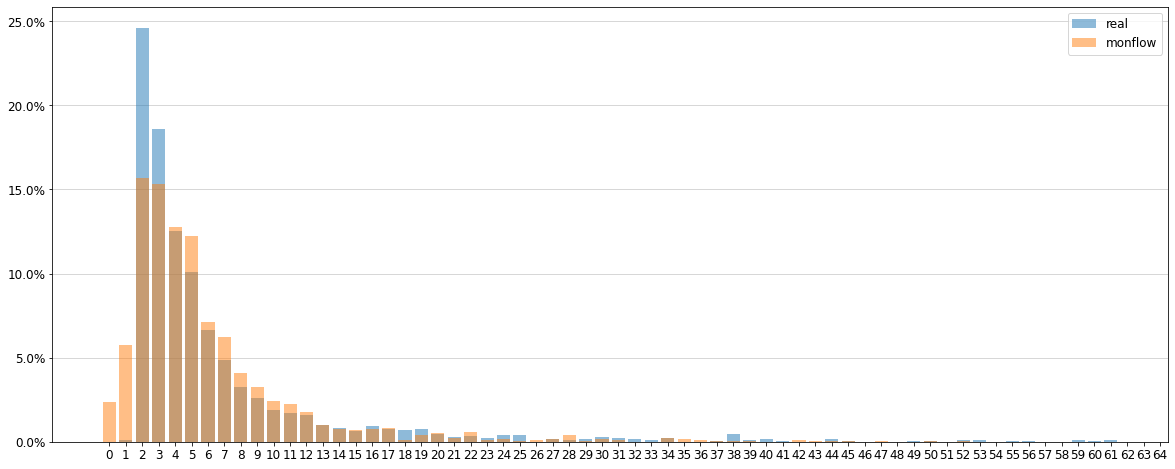

In [46]:
fig, ax = plt.subplots(figsize=(20,8))
boxes = np.arange(-0.5, 62, 1).tolist()
plt.grid(zorder=0, linewidth=0.5, axis='y')
ax.hist(real_series, bins=boxes, rwidth=0.8, density=True, alpha=0.5, histtype='bar', label="real", zorder=3);
ax.hist(monflow_series, bins=boxes, rwidth=0.8, density=True, alpha=0.5, histtype='bar', label="monflow", zorder=3);
ax.set_xticks(np.arange(0, 65, 1));
ax.legend()
# ax.set_yticks(np.arange(0, 0.35, 0.025))
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))

## Plot Raw Difference

In [13]:
diff_series = df["rawdiff"]
diff_series.describe()

count    1657.000000
mean        0.622209
std         3.292825
min       -13.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        32.000000
Name: rawdiff, dtype: float64

In [14]:
diff_series.shape

(1657,)

In [15]:
len(diff_series[diff_series == 1])

236

In [16]:
x = np.histogram(diff_series, bins=45)
x

(array([  1,   0,   0,   4,   0,   2,   5,   6,  11,  29,  66, 157, 244,
        493, 236, 136,  98,  41,  27,  24,  18,  13,  12,   8,   1,   5,
          1,   3,   2,   5,   0,   2,   1,   1,   1,   1,   1,   0,   0,
          1,   0,   0,   0,   0,   1], dtype=int64),
 array([-13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
         -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
          9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
         20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
         31.,  32.]))

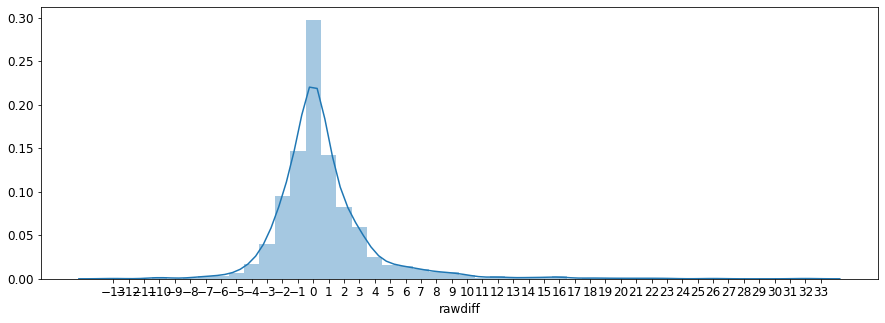

In [51]:
# sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
boxes = np.arange(-13, 34) - 0.5
g = sns.distplot(diff_series, bins=boxes, kde=True)
g.set_xticks(np.arange(-13, 34, 1));

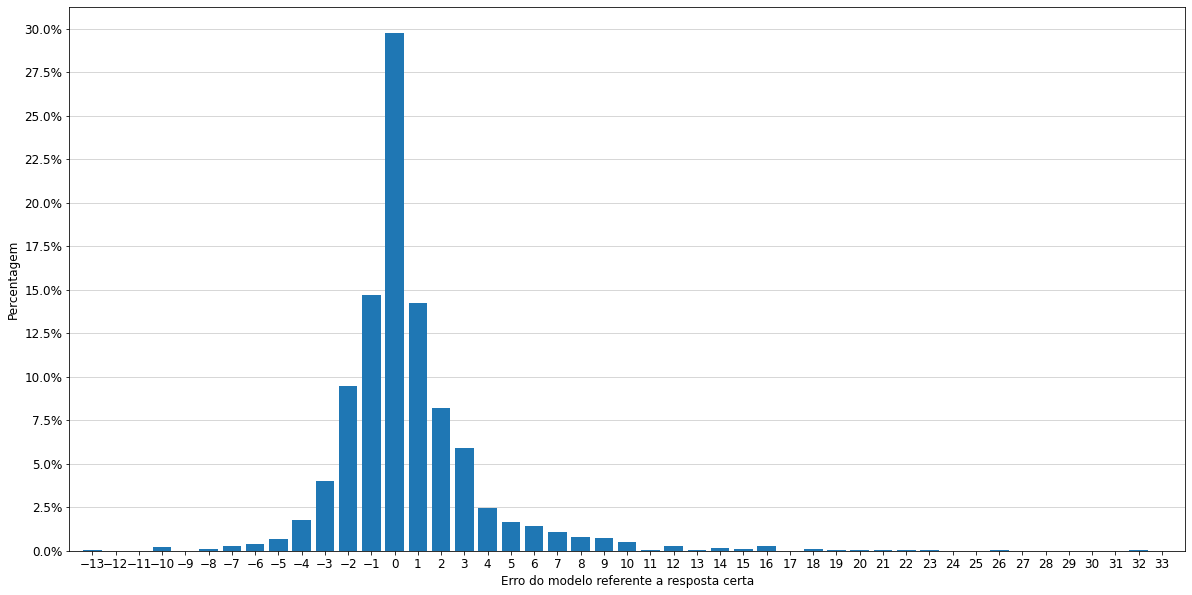

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
boxes = np.arange(-13, 34) - 0.5
plt.grid(zorder=0, linewidth=0.5, axis='y')
ax.hist(diff_series, bins=boxes, rwidth=0.8, density=True, histtype='bar', zorder=3);
ax.set_xticks(np.arange(-13, 34, 1));
ax.set_xlim(-14, 34)
# ax.set_yticks(np.arange(0, 0.31, 0.01));

ax.set_ylabel('Percentagem')
ax.set_xlabel('Erro do modelo referente a resposta certa')
ax.set_yticks(np.arange(0, 0.32, 0.025))
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))
fig.savefig('diff.png', bbox_inches='tight', dpi=300)


## Plot Abs Difference

In [19]:
abs_series = df["absdiff"]
abs_series.describe()

count    1657.000000
mean        1.910078
std         2.753084
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        32.000000
Name: absdiff, dtype: float64

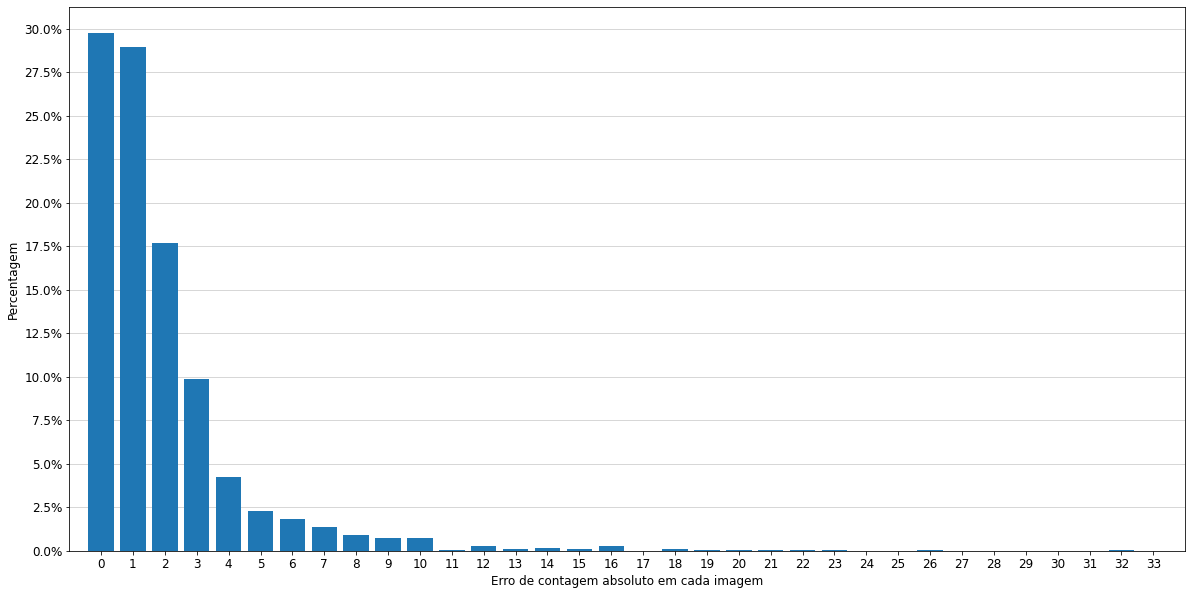

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
boxes = np.arange(0, 34) - 0.5
plt.grid(zorder=0, linewidth=0.5, axis='y')
ax.hist(abs_series, bins=boxes, rwidth=0.8, density=True, histtype='bar', zorder=3);
ax.set_xticks(np.arange(0, 34, 1));
# ax.set_yticks(np.arange(0, 0.3, 0.01), minor=True);
ax.set_xlim(-1, 34)
# ax.set_yticks(np.arange(0, 0.31, 0.01));
ax.set_ylabel('Percentagem')
ax.set_xlabel('Erro de contagem absoluto em cada imagem')
ax.set_yticks(np.arange(0, 0.32, 0.025))
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))
fig.savefig('diff_abs.png', bbox_inches='tight', dpi=300)



In [20]:
fig, ax = plt.subplots(figsize=(20,8))
boxes = np.arange(-13, 34) - 0.5
plt.grid(zorder=0, linewidth=0.5, axis='y')
ax.hist(diff_series, bins=boxes, rwidth=0.8, density=True, histtype='bar', zorder=3);
ax.set_xticks(np.arange(-13, 34, 1));
ax.set_xlim(-14, 34)
# ax.set_yticks(np.arange(0, 0.35, 0.025))
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))plt.hist(diff_series, bins=b0)

SyntaxError: invalid syntax (<ipython-input-20-418f6bf6d609>, line 8)

In [ ]:
mean_df = df.groupby("CAMERAID").agg(['mean'])
print(mean_df.shape)
mean_df

In [ ]:
ax0.hist(out_single["rssi"], weights=np.ones(len(out_single["rssi"])) / len(out_single["rssi"]), bins=b0, alpha=0.4, label="pkts outside")
